In [1]:
import torch
from torch import nn
import torchvision
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import ssl
import seaborn as sns
import time
from MaSS import MaSS
import torchbearer

sns.set_theme()
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyper-parameters
num_epochs = 50
batch_size = 64
learning_rate = 0.01

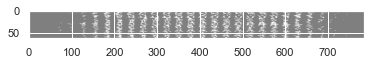

In [4]:
# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
'''
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
'''
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [5]:
class FCNClass(nn.Module):
    def __init__(self):
        # input: 784 Dimensional Vectors as input
        super(FCNClass, self).__init__()

        # layer 1 (784-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden1 = nn.Sequential(
                        nn.Linear(784, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 2 (100-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden2 = nn.Sequential(
                        nn.Linear(100, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 3 (100-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden3 = nn.Sequential(
                        nn.Linear(100, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 4 (100-10)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.output = nn.Sequential(
                        nn.Linear(100, 10),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )
        # 10 softmax activated output neurons
        self.outputLayer = nn.Softmax(dim=1)


    def forward(self, x):
        midLevel = self.hidden1(x)
        midLevel = self.hidden2(midLevel)
        midLevel = self.hidden3(midLevel)
        output   = self.output(midLevel)
        #activation = self.outputLayer(output)
        return output


In [6]:
class FCNClass_batch1(nn.Module):
    def __init__(self):
        # input: 784 Dimensional Vectors as input
        super(FCNClass_batch1, self).__init__()

        # layer 1 (784-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden1 = nn.Sequential(
                        nn.Linear(784, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 2 (100-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden2 = nn.Sequential(
                        nn.Linear(100, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 3 (100-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden3 = nn.Sequential(
                        nn.Linear(100, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 4 (100-10)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.output = nn.Sequential(
                        nn.Linear(100, 10),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )
        # 10 softmax activated output neurons
        self.outputLayer = nn.Softmax(dim=1)

        
        self.normised = nn.BatchNorm1d(num_features=10)


    def forward(self, x):
        midLevel = self.hidden1(x)
        midLevel = self.hidden2(midLevel)
        midLevel = self.hidden3(midLevel)
        output   = self.output(midLevel)
        normised = self.normised(output)
        
        return normised


In [7]:
class FCNClass_batch2(nn.Module):
    def __init__(self):
        # input: 784 Dimensional Vectors as input
        super(FCNClass_batch2, self).__init__()

        # layer 1 (784-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden1 = nn.Sequential(
                        nn.Linear(784, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 2 (100-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden2 = nn.Sequential(
                        nn.Linear(100, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )

        # Layer 3 (100-100)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.hidden3 = nn.Sequential(
                        nn.Linear(100, 100),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )
        
        self.normised = nn.BatchNorm1d(num_features=100)

        # Layer 4 (100-10)
        # Hidden Layer
        # Dropout Layer with keep prob 0.5
        self.output = nn.Sequential(
                        nn.Linear(100, 10),
                        nn.ReLU(),
                        nn.Dropout(p=0.5)
        )
        
        
        # 10 softmax activated output neurons
        self.outputLayer = nn.Softmax(dim=1)
        

    def forward(self, x):
        midLevel = self.hidden1(x)
        midLevel = self.hidden2(midLevel)
        midLevel = self.hidden3(midLevel)
        normised = self.normised(midLevel)
        output   = self.output(normised)
        return output


In [8]:
#model = FCNClass().to(device)
#model = FCNClass_batch1().to(device) # not great based on initial test
model = FCNClass_batch2().to(device)
ModelName = 'FCNBatchNorm'

criterion = nn.CrossEntropyLoss()
#optimizer = MaSS(model.parameters(), lr=learning_rate, alpha=0.05, kappa_t=3)
#optimizer = torch.optim.SGD( model.parameters(), momentum = 0.9, lr=learning_rate, nesterov = True,)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
opt = "Adam" # sgd,  nesterov and mass


In [9]:
epochs = []
n_total_steps = len(train_loader)
train_loss_average = torch.zeros(num_epochs)
valid_loss_average = torch.zeros(num_epochs)
train_accuracy = torch.zeros(num_epochs)
valid_accuracy = torch.zeros(num_epochs)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[60,120], gamma=0.1)


In [10]:

def train():

    model.train()
    running_train_loss = 0
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        train_step_loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        train_step_loss.backward()
        optimizer.step()

        running_train_loss += train_step_loss.item()

        #predictions
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100.*correct/total

    #get the training losses and accuracies
    train_loss_average[epoch] = running_train_loss/len(train_loader)
    train_accuracy[epoch] = accuracy

    print(f'Training Loss: {running_train_loss/len(train_loader)}\t \
            Training accuracy: {train_accuracy[epoch]}')


In [11]:
def test():
    model.eval()

    running_valid_loss = 0
    correct = 0
    total = 0

    #validation loop
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            valid_step_loss = criterion(outputs, labels)

            running_valid_loss += valid_step_loss.item()

            #predictions
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100.*correct/total

    #get the validation losses
    valid_loss_average[epoch] = running_valid_loss/len(test_loader)
    valid_accuracy[epoch] = accuracy


    print(f'Validation Loss: {running_valid_loss/len(test_loader)}\t \
            Validation accuracy: {valid_accuracy[epoch]}\t \
            LR:{curr_lr}')

In [12]:
start_time = time.time()
for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')

    #get the current learning rate
    curr_lr = optimizer.param_groups[0]['lr']

    train()
    test()

    epochs.append(epoch)



    #step the learning rate scheduler
    scheduler.step()


print("--- %s seconds ---" % (time.time() - start_time))
print('Finished Training')


Epoch: 1
Training Loss: 2.0542473613834584	             Training accuracy: 20.786666870117188
Validation Loss: 1.50965620150232	             Validation accuracy: 46.790000915527344	             LR:0.01
Epoch: 2
Training Loss: 1.8697750342171837	             Training accuracy: 28.121665954589844
Validation Loss: 1.3867607405231257	             Validation accuracy: 48.45000076293945	             LR:0.01
Epoch: 3
Training Loss: 1.833231170548559	             Training accuracy: 28.683332443237305
Validation Loss: 1.3686205399264195	             Validation accuracy: 48.380001068115234	             LR:0.01
Epoch: 4
Training Loss: 1.8284416529161336	             Training accuracy: 28.655000686645508
Validation Loss: 1.3715007343110006	             Validation accuracy: 48.59000015258789	             LR:0.01
Epoch: 5
Training Loss: 1.8211473610355402	             Training accuracy: 28.851667404174805
Validation Loss: 1.3506319948062775	             Validation accuracy: 48.939998626708984	      

In [13]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')



Accuracy of the network on the 10000 test images: 49.45 %


In [ ]:
def plotLosses(epochs, Loss, title):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.plot(epochs, Loss, label = "Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.savefig(title + '.png')

In [ ]:

#plot combo loss diagrams
plt.figure(figsize=(10,6))
#plt.title(f'FCN_batchnorm2-{opt} lr:{learning_rate} acc:{acc} epochs-{num_epochs}') #-mac
plt.title(f'FCN_batchnorm2-{opt} lr:{learning_rate} acc-{acc} epochs-{num_epochs}') #-Win

plt.plot(epochs, train_loss_average, label = "Training loss")
plt.plot(epochs, valid_loss_average, label = 'Validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.savefig(f'FCN_batchnorm2-Loss-{opt} lr:{learning_rate} acc:{acc}.png' epochs-{num_epochs}) #-mac
plt.savefig(f'FCN_batchnorm2-Loss-{opt} lr-{learning_rate} acc-{acc} epochs-{num_epochs}.png') #-win

#plot validation accuracies
plt.figure(figsize=(10,6))
#plt.title(f'FCN_batchnorm2-{opt} lr:{learning_rate} acc:{acc} epochs-{num_epochs}') #-mac
plt.title(f'FCN_batchnorm2-{opt} lr-{learning_rate} acc-{acc} epochs-{num_epochs}') #-win
plt.plot(epochs, train_accuracy, label = "Training accuracy")
plt.plot(epochs, valid_accuracy, label = 'Validation accuracy')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
#plt.savefig(f'FCN_batchnorm2-Accuracy-{opt} lr:{learning_rate} acc:{acc}.png' epochs-{num_epochs}) #-mac
plt.savefig(f'FCN_batchnorm2-Accuracy-{opt} lr-{learning_rate} acc-{acc} epochs-{num_epochs}.png') #-win


#PATH = f'./FCN_batchnorm2-{opt}-lr:{learning_rate}-acc:{acc} epochs-{num_epochs}.pth' #-mac
PATH = f'./FCN_batchnorm2-{opt}-lr-{learning_rate}-acc-{acc} epochs-{num_epochs}.pth' #-win

torch.save(model.state_dict(), PATH)

In [14]:
from pathlib import Path

df = pd.DataFrame(train_loss_average, columns=['train_loss'], index=[i for i in range(1,151)])
filepath = Path(f'ResultsData/trainloss/{ModelName}-{opt}-{learning_rate}-{acc}.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

df = pd.DataFrame(valid_loss_average, columns=['valid_loss'], index=[i for i in range(1,151)])
filepath = Path(f'ResultsData/validloss/{ModelName}-{opt}-{learning_rate}-{acc}.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

df = pd.DataFrame(train_accuracy, columns=['train_accuracy'], index=[i for i in range(1,151)])
filepath = Path(f'ResultsData/trainacc/{ModelName}-{opt}-{learning_rate}-{acc}.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

df = pd.DataFrame(valid_accuracy, columns=['valid_accuracy'], index=[i for i in range(1,151)])
filepath = Path(f'ResultsData/validacc/{ModelName}-{opt}-{learning_rate}-{acc}.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

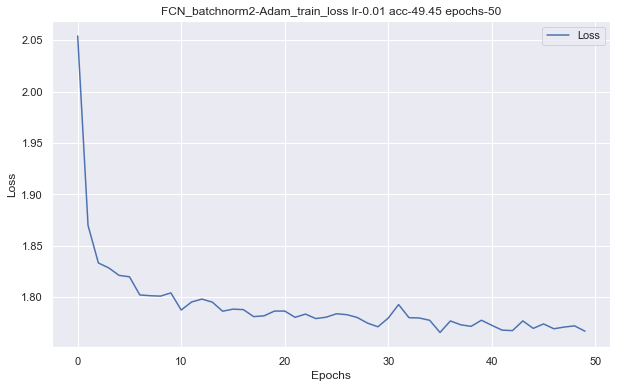

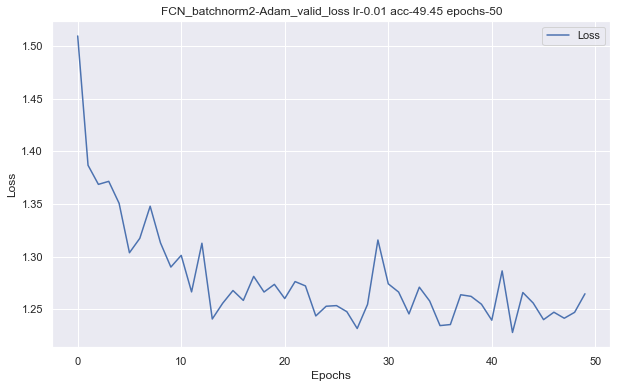

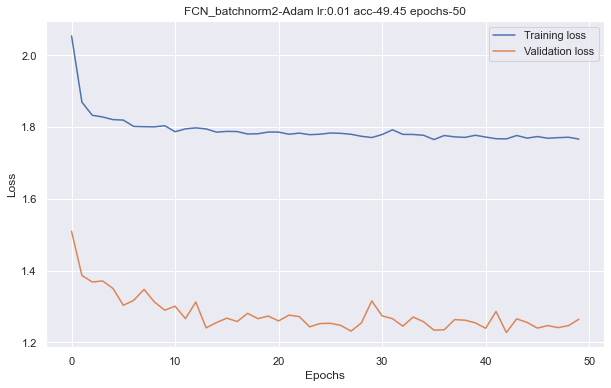

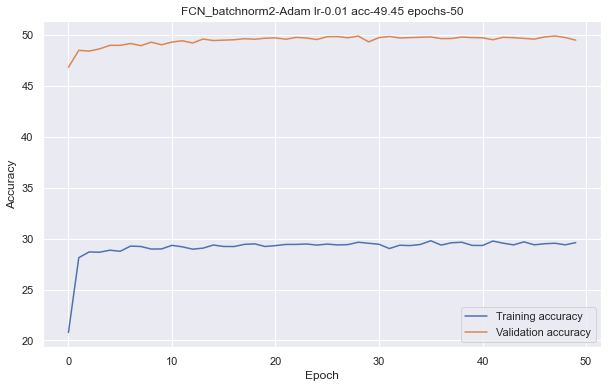

In [15]:
#plot the loss diagrams
#mac
#plotLosses(epochs, train_loss_average, f'FCN_batchnorm2-{opt}_train_loss lr:{learning_rate} acc:{acc} epochs-{num_epochs}')
#plotLosses(epochs, valid_loss_average, f'FCN_batchnorm2-{opt}_valid_loss lr:{learning_rate} acc:{acc} epochs-{num_epochs}')
#win
plotLosses(epochs, train_loss_average, f'FCN_batchnorm2-{opt}_train_loss lr-{learning_rate} acc-{acc} epochs-{num_epochs}')
plotLosses(epochs, valid_loss_average, f'FCN_batchnorm2-{opt}_valid_loss lr-{learning_rate} acc-{acc} epochs-{num_epochs}')

#plot combo loss diagrams
plt.figure(figsize=(10,6))
#plt.title(f'FCN_batchnorm2-{opt} lr:{learning_rate} acc:{acc} epochs-{num_epochs}') #-mac
plt.title(f'FCN_batchnorm2-{opt} lr:{learning_rate} acc-{acc} epochs-{num_epochs}') #-Win

plt.plot(epochs, train_loss_average, label = "Training loss")
plt.plot(epochs, valid_loss_average, label = 'Validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.savefig(f'FCN_batchnorm2-Loss-{opt} lr:{learning_rate} acc:{acc}.png' epochs-{num_epochs}) #-mac
plt.savefig(f'FCN_batchnorm2-Loss-{opt} lr-{learning_rate} acc-{acc} epochs-{num_epochs}.png') #-win

#plot validation accuracies
plt.figure(figsize=(10,6))
#plt.title(f'FCN_batchnorm2-{opt} lr:{learning_rate} acc:{acc} epochs-{num_epochs}') #-mac
plt.title(f'FCN_batchnorm2-{opt} lr-{learning_rate} acc-{acc} epochs-{num_epochs}') #-win
plt.plot(epochs, train_accuracy, label = "Training accuracy")
plt.plot(epochs, valid_accuracy, label = 'Validation accuracy')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
#plt.savefig(f'FCN_batchnorm2-Accuracy-{opt} lr:{learning_rate} acc:{acc}.png' epochs-{num_epochs}) #-mac
plt.savefig(f'FCN_batchnorm2-Accuracy-{opt} lr-{learning_rate} acc-{acc} epochs-{num_epochs}.png') #-win


#PATH = f'./FCN_batchnorm2-{opt}-lr:{learning_rate}-acc:{acc} epochs-{num_epochs}.pth' #-mac
PATH = f'./FCN_batchnorm2-{opt}-lr-{learning_rate}-acc-{acc} epochs-{num_epochs}.pth' #-win

torch.save(model.state_dict(), PATH)